This File include python coding for ML from importing data to preprocessing it.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data=pd.read_csv("/content/housing.csv")

In [50]:
data.head()# Heat shows First 5 Rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Access perticular column from dataset

In [4]:
total_rooms=data["total_rooms"]

In [5]:
total_rooms.head()

,total_rooms
0,880.0
1,7099.0
2,1467.0
3,1274.0
4,1627.0


Data Cleaning - Removing irrelevant data

In [22]:
# Drop the 'ocean_proximity' column from the DataFrame
# axis=1 specifies that we are dropping a column
data = data.drop("ocean_proximity", axis=1)

In [12]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


If your data have any missing value

In [53]:
!pip install scikit-learn

In [8]:
from sklearn.impute import SimpleImputer

In [23]:
# Drop the specified columns from the DataFrame and assign the result to x
x = data.drop(["median_house_value", "total_rooms"], axis=1)

In [19]:
imputer=SimpleImputer(strategy="mean")

In [24]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_bedrooms      20433 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB
None


In [26]:
imputer.fit(x)

SimpleImputer(strategy='median')

In [27]:
x_imputed=imputer.transform(x)

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_bedrooms      20433 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [29]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [30]:
data=data.dropna()

In [31]:
data=data.fillna(data.mean)

Let's create plotting of the data

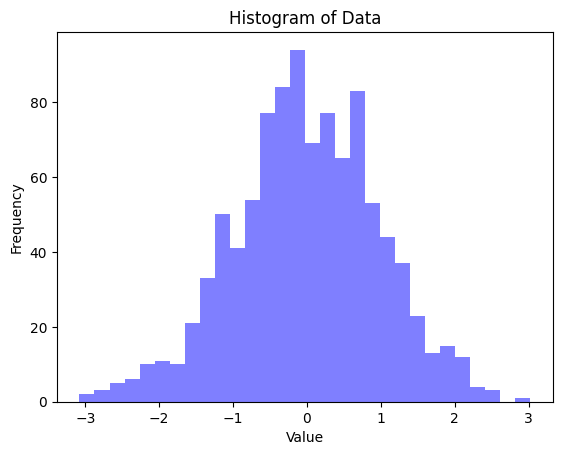

In [34]:
#Histogram
data=np.random.normal(size=1000)
plt.hist(data,bins=30,alpha=0.5, color='b')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

Spliting data into traning and testing

In [41]:
from sklearn.model_selection import train_test_split

In [47]:
X=data.drop("median_house_value",axis=1)
y=data["median_house_value"]

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)